<a href="https://colab.research.google.com/github/Manos-Mak120/Makrakis-Manos/blob/main/Copy_of_Lesson_9_vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
#ΧΡΗΣΙΜΟ ΓΙΑ ΝΑ ΒΡΟΥΜΕ ΤΟ ΑΝ ΤΑ ΑΡΘΡΑ ΕΧΟΥΝ ΥΒΡΙΣΤΙΚΟ ΛΟΓΟ Ή ΟΧΙ ΕΙΝΑΙ ΑΡΝΗΤΙΚΆ Ή ΘΕΤΙΚΆ/ ΦΕΡΝΟΥΜΕ ΔΕΔΟΜΕΝΑ ΚΑΙ VECTORIZER

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

Επειδή θα δουλέψουμε με ανάλυση γλώσσας, φέρνουμε από την αρχή το λεξικό της spacy

In [84]:
 !python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 58.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Φτιάχνουμε κατευθείαν και το nlp μοντέλο από το λεξικό

In [85]:
nlp = spacy.load('el_core_news_sm')

Φέρνουμε τα άρθρα μας

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
trump_articles_df = pd.read_csv("/content/drive/MyDrive/trump_articles_df.csv")
trump_articles_df.head(200) # This is a syntax error - head() takes an int argument not slice

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation
0,https://www.newsbomb.gr/kosmos/story/1651721/t...,Τραμπ: «Η US Steel παραμένει στην Αμερική» – Σ...,2025-05-24,07:55:49+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο πρώην πρόεδρος ανακοινώνει επένδυση 14 δισ. ...,Ο Ντόναλντ Τραμπ ανακοίνωσε το βράδυ της Παρασ...,https://img.bbmd.gr/img/1260/max/82/2025/05/24...,Ο πρόεδρος Ντόναλντ Τραμπ σιγοντάρει το κινητό...
1,https://www.newsbomb.gr/oikonomia/story/165170...,ΗΠΑ – Χρηματιστήριο: Κλείσιμο με πτώση,2025-05-24,01:25:30+03:00,ΟΙΚΟΝΟΜΙΑ,Newsbomb,Ο δείκτης Dow Jones της βιομηχανίας έκλεισε με...,Απώλειες κατέγραψε χθες Παρασκευή τοχρηματιστή...,https://img.bbmd.gr/img/1260/max/82/2025/04/08...,Φώτο Αρχείου: Ένας πίνακας πάνω από τον χώρο δ...
2,https://www.newsbomb.gr/kosmos/story/1651703/i...,ΗΠΑ άρουν και επισήμως τις κυρώσεις στη Συρία ...,2025-05-24,01:01:50+03:00,ΚΟΣΜΟΣ,Newsbomb,Πράσινο φως σε επενδύσεις στη χώρα της Μέσης Α...,Η αμερικανική κυβέρνηση προχώρησε στην επίσημη...,https://img.bbmd.gr/img/1260/max/82/2025/04/03...,AFP or licensors
3,https://www.newsbomb.gr/oikonomia/story/165169...,ΗΠΑ: Σε πτώση το δολάριο – Αβεβαιότητα λόγω δα...,2025-05-23,23:28:49+03:00,ΟΙΚΟΝΟΜΙΑ,Newsbomb,Αύξηση των στοιχημάτων κατά του δολαρίου,Στο χαμηλότερο επίπεδο από το 2023υποχώρησε το...,https://img.bbmd.gr/img/1260/max/82/2018/04/01...,NaN
4,https://www.newsbomb.gr/kosmos/story/1651675/t...,Τραμπ για δασμούς: Δεν επιδιώκω συμφωνία με τη...,2025-05-23,21:49:39+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο Πρόεδρος των ΗΠΑ Ντόναλντ Τραμπ αναζωπύρωσε ...,Ο Αμερικανός πρόεδρος Τραμπ προειδοποίησε ότι ...,https://img.bbmd.gr/img/1260/max/82/2025/05/23...,"Ο πρόεδρος των ΗΠΑ, Ντόναλντ Τραμπ\nAP"
...,...,...,...,...,...,...,...,...,...,...
135,https://www.newsbomb.gr/kosmos/story/1648432/i...,Η πρώτη αντίδραση Τραμπ στην πρόταση Πούτιν γι...,2025-05-11,07:45:34+03:00,ΚΟΣΜΟΣ,Newsbomb,Παράθυρο ελπίδας για τον πόλεμο στην Ουκρανία ...,Ο πρόεδρος των ΗΠΑΝτόναλντ Τραμπδήλωσε σήμερα ...,https://img.bbmd.gr/img/1260/max/82/2025/05/11...,O Ντόναλντ Τραμπ απάντησε στον Βλαντίμιρ Πούτι...
136,https://www.newsbomb.gr/kosmos/story/1648429/a...,Απομάκρυνση Γουόλτζ: Ο Τραμπ δημιουργεί ζώνη π...,2025-05-11,07:27:29+03:00,ΚΟΣΜΟΣ,Εμμανουήλ Μπέζας,Η «σύγκρουση» μεταξύ της παλιάς φρουράς στη Γε...,ΟΝτόναλντ Τραμπδεν έχει το πολιτικό σύστημα μα...,https://img.bbmd.gr/img/1260/max/82/2025/05/11...,Ο πρώην σύμβουλος εθνικής ασφάλειας του Λευκού...
137,https://www.newsbomb.gr/kosmos/story/1648420/t...,Τραμπ: Χαιρετίζει την πρόοδο στις διαπραγματεύ...,2025-05-11,03:15:20+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο Τραμπ πως διαπραγματεύτηκαν μια «πλήρη επανε...,Ο πρόεδρος των ΗΠΑ Ντόναλντ Τραμπχαιρέτισε σήμ...,https://img.bbmd.gr/img/1260/max/82/2025/05/05...,Πολλές ειδήσεις έβγαλε η συνέντευξη Τραμπ στο ...
138,https://www.newsbomb.gr/kosmos/story/1648308/t...,Τραμπ: Ινδία και Πακιστάν συμφώνησαν για «πλήρ...,2025-05-10,15:00:45+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο Ντόναλντ Τραμπ ανακοίνωσε ότι Ινδία και Πακι...,"Το μεσημέρι του Σαββάτου (10/05), οΝτόναλντ Τρ...",https://img.bbmd.gr/img/1260/max/82/2025/05/10...,AP.


θα χρησιμοποιήσουμε τα παραπάνω άρθρα που μαζέψαμε από την efsyn

In [88]:
trump_articles_df.head(115)

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation
0,https://www.newsbomb.gr/kosmos/story/1651721/t...,Τραμπ: «Η US Steel παραμένει στην Αμερική» – Σ...,2025-05-24,07:55:49+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο πρώην πρόεδρος ανακοινώνει επένδυση 14 δισ. ...,Ο Ντόναλντ Τραμπ ανακοίνωσε το βράδυ της Παρασ...,https://img.bbmd.gr/img/1260/max/82/2025/05/24...,Ο πρόεδρος Ντόναλντ Τραμπ σιγοντάρει το κινητό...
1,https://www.newsbomb.gr/oikonomia/story/165170...,ΗΠΑ – Χρηματιστήριο: Κλείσιμο με πτώση,2025-05-24,01:25:30+03:00,ΟΙΚΟΝΟΜΙΑ,Newsbomb,Ο δείκτης Dow Jones της βιομηχανίας έκλεισε με...,Απώλειες κατέγραψε χθες Παρασκευή τοχρηματιστή...,https://img.bbmd.gr/img/1260/max/82/2025/04/08...,Φώτο Αρχείου: Ένας πίνακας πάνω από τον χώρο δ...
2,https://www.newsbomb.gr/kosmos/story/1651703/i...,ΗΠΑ άρουν και επισήμως τις κυρώσεις στη Συρία ...,2025-05-24,01:01:50+03:00,ΚΟΣΜΟΣ,Newsbomb,Πράσινο φως σε επενδύσεις στη χώρα της Μέσης Α...,Η αμερικανική κυβέρνηση προχώρησε στην επίσημη...,https://img.bbmd.gr/img/1260/max/82/2025/04/03...,AFP or licensors
3,https://www.newsbomb.gr/oikonomia/story/165169...,ΗΠΑ: Σε πτώση το δολάριο – Αβεβαιότητα λόγω δα...,2025-05-23,23:28:49+03:00,ΟΙΚΟΝΟΜΙΑ,Newsbomb,Αύξηση των στοιχημάτων κατά του δολαρίου,Στο χαμηλότερο επίπεδο από το 2023υποχώρησε το...,https://img.bbmd.gr/img/1260/max/82/2018/04/01...,NaN
4,https://www.newsbomb.gr/kosmos/story/1651675/t...,Τραμπ για δασμούς: Δεν επιδιώκω συμφωνία με τη...,2025-05-23,21:49:39+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο Πρόεδρος των ΗΠΑ Ντόναλντ Τραμπ αναζωπύρωσε ...,Ο Αμερικανός πρόεδρος Τραμπ προειδοποίησε ότι ...,https://img.bbmd.gr/img/1260/max/82/2025/05/23...,"Ο πρόεδρος των ΗΠΑ, Ντόναλντ Τραμπ\nAP"
...,...,...,...,...,...,...,...,...,...,...
110,https://www.newsbomb.gr/kosmos/story/1649090/l...,Λευκός Οίκος: Ο Τραμπ θα συναντηθεί με τον ηγέ...,2025-05-13,18:51:49+03:00,ΚΟΣΜΟΣ,Newsbomb,"Για τον αλ-Σαράα, ένα έστω και ολιγόλεπτο τετ-...",Ο πρόεδρος των ΗΠΑΝτόναλντ Τραμπθα συναντηθεί ...,https://img.bbmd.gr/img/1260/max/82/2025/05/13...,O Nτόναλντ Τραμπ στο Air Force One\nAssociated...
111,https://www.newsbomb.gr/kosmos/story/1649071/s...,Συμφωνία- «μαμούθ» του Τραμπ με τη Σαουδική Αρ...,2025-05-13,17:27:41+03:00,ΚΟΣΜΟΣ,Newsbomb,Πρόκειται για μία από τις συμφωνίες καθώς θα α...,Στη Σαουδική Αραβία βρίσκεται από το πρωί ο Ντ...,https://img.bbmd.gr/img/1260/max/82/2025/05/13...,Copyright 2025 The Associated Press. All right...
112,https://www.newsbomb.gr/kosmos/story/1649067/t...,Τα ασυνήθιστα δώρα στους προέδρους των ΗΠΑ - Α...,2025-05-13,17:17:50+03:00,ΚΟΣΜΟΣ,Newsbomb,Ένας πλήρης κατάλογος με τα πιο παράξενα δώρα ...,Ηπροσφορά ενός υπερπολυτελούς αεροσκάφους στον...,https://img.bbmd.gr/img/1260/max/82/2025/05/13...,"Το αντίγραφο του γραφείου του Οβάλ Γραφείου, τ..."
113,https://www.newsbomb.gr/kosmos/story/1649025/t...,«Πριγκιπική» υποδοχή με ιππικό και χαλιά για Τ...,2025-05-13,13:57:44+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο Τραμπ θα επισκεφθεί πρώτα το Ριάντ - όπου λα...,"Ο πρόεδρος των ΗΠΑ,Ντόναλντ Τραμπ, έφτασε σήμε...",https://img.bbmd.gr/img/1260/max/82/2025/05/13...,Ο πρόεδρος Ντόναλντ Τραμπ στο βασιλικό παλάτι ...


In [89]:
trump_articles_df['date'] = pd.to_datetime(trump_articles_df['date'], format='mixed', dayfirst=True, errors='coerce')

In [90]:
trump_articles_df.dtypes

,0
article_url,object
title,object
date,datetime64[ns]
time,object
section,object
author,object
excerpt,object
text_body,object
feat_img_link,object
feat_img_cation,object


O τύπος δεδομένων της ημερομηνίας (date) είναι object (κείμενο). Ας τη μετατρέψουμε σε datetime.

Πρώτα βλέπουμε τη μορφή της - πώς είναι γραμμένη.

In [91]:
short_trump_df['date'] = short_trump_df['date'].dt.tz_localize(None)

H μορφή της είναι: ΥΥΥΥ-ΜΜ-DD HH:MM --> %Y-%m-%d %H:%M

Ας ξαναδούμε τον τύπο των δεδομένων

Ας φτιάξουμε ένα μικρότερο dataframe, που να περιέχει μόνο το datetime και το full_text

In [92]:
short_trump_df = trump_articles_df[['date','excerpt']]
short_trump_df = short_trump_df.reset_index(drop=True)
short_trump_df.head(1)

,date,excerpt
0,2025-05-24,Ο πρώην πρόεδρος ανακοινώνει επένδυση 14 δισ. ...


Ας φτιάξουμε στήλες για το έτος, το μήνα, την ημέρα και την ώρα (αυτό είναι εφικτό γιατί η ημερομηνία είναι datetime)

In [93]:
short_trump_df['year'] = pd.DatetimeIndex(short_trump_df['date']).year
short_trump_df['month'] = pd.DatetimeIndex(short_trump_df['date']).month
short_trump_df['day'] = pd.DatetimeIndex(short_trump_df['date']).day
short_trump_df['hour'] = pd.DatetimeIndex(short_trump_df['date']).hour

In [94]:
short_trump_df.head()

,date,excerpt,year,month,day,hour
0,2025-05-24,Ο πρώην πρόεδρος ανακοινώνει επένδυση 14 δισ. ...,2025,5,24,0
1,2025-05-24,Ο δείκτης Dow Jones της βιομηχανίας έκλεισε με...,2025,5,24,0
2,2025-05-24,Πράσινο φως σε επενδύσεις στη χώρα της Μέσης Α...,2025,5,24,0
3,2025-05-23,Αύξηση των στοιχημάτων κατά του δολαρίου,2025,5,23,0
4,2025-05-23,Ο Πρόεδρος των ΗΠΑ Ντόναλντ Τραμπ αναζωπύρωσε ...,2025,5,23,0


# Vectorization starts here...

# Διανυσματοποίηση Εγγράφων/κειμένων (Vectorization)


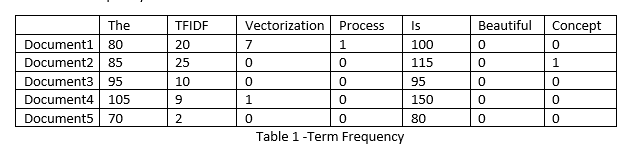

In [95]:
#metatroph keimenwn se arithmo

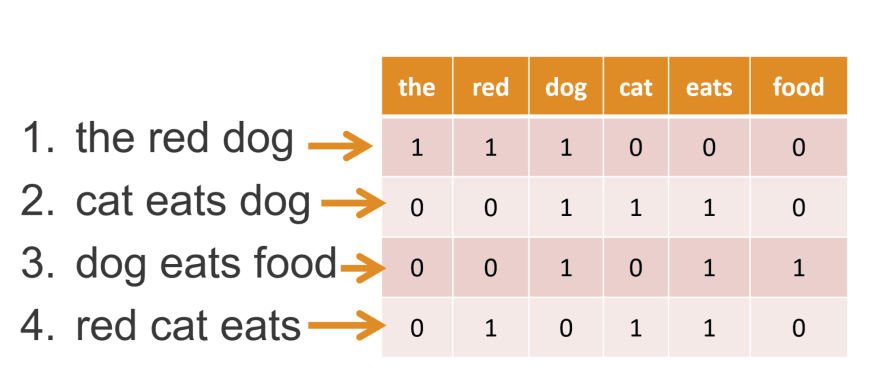

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

O CountVectorizer() παίρνει διάφορες παραμέτρους μέσα στην παρένθεση.

Πληροφορίες για όλες τις παραμέτρους βρίσκουμε εδώ: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Ας φτιάξουμε έναν vectorizer με τις default παραμέτρους, δηλαδή χωρίς να βάλουμε τίποτα μέσα στην παρένθεση)

In [97]:
cv = CountVectorizer() #πάντα αυτό

Το dataframe μας περιέχει τη στήλη "full_text" με το πλήρες κείμενο του κάθε άρθρου.

In [98]:
short_trump_df.head(5)

,date,excerpt,year,month,day,hour
0,2025-05-24,Ο πρώην πρόεδρος ανακοινώνει επένδυση 14 δισ. ...,2025,5,24,0
1,2025-05-24,Ο δείκτης Dow Jones της βιομηχανίας έκλεισε με...,2025,5,24,0
2,2025-05-24,Πράσινο φως σε επενδύσεις στη χώρα της Μέσης Α...,2025,5,24,0
3,2025-05-23,Αύξηση των στοιχημάτων κατά του δολαρίου,2025,5,23,0
4,2025-05-23,Ο Πρόεδρος των ΗΠΑ Ντόναλντ Τραμπ αναζωπύρωσε ...,2025,5,23,0


To dataframe μας έχει 6 στήλες και 120 γραμμές: 120 άρθρα

In [99]:
short_trump_df.shape

(140, 6)

Περνάμε τη στήλη full_text από τον vectorizer

In [100]:
count_vector = cv.fit_transform(short_trump_df['excerpt']) #παίρνουμε τα κείμενα

Με αυτό τον τρόπο μετατρέψαμε τα κείμενα των άρθρων σε vectors, δηλαδή σε σειρές αριθμών. Το αποτέλεσμα του vectorization είναι ένας πίνακας (matrix) με διαστάσεις 120 x 11.928.

In [101]:
count_vector #μοναδικές λέξεις 11520 + 120

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2541 stored elements and shape (140, 1148)>

In [102]:
count_vector.shape

(140, 1148)

120 είναι τα άρθρα που είχε το dataframe μας και 11.928 είναι το σύνολο των μοναδικών λέξεων (Bag of Words) που υπάρχουν σε όλα τα κείμενα (και στα 120).

In [103]:
BoW = cv.get_feature_names_out()
list(BoW)[1400:1410]

[]

Φτιάχνουμε ένα dataframe με τα αποτελέσματα του vectorizer.

In [104]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,02,07,13,14,145,149,175,18ο,19,...,όργανο,όροι,όρος,όσοι,ότι,όχι,ύφεση,ώρα,ώρες,ώστε
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Vectorizer με stop words**

Ξαναφτιάχνουμε τον vectorizer, αλλά τώρα βάζουμε τα stopwords σαν παράμετρο μέσα στην παρένθση

In [105]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

Και ξαναδιανυσματοποιούμε τα κείμενα των άρθρων μας

In [106]:
count_vector = cv.fit_transform(short_trump_df['excerpt'])

Ο νέος μας πίνακας έχει περίπου 400 στήλες λιγότερες (εφόσον δεν μπήκαν στο BoW τα stopwords)

In [107]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,02,07,13,14,145,149,175,18ο,19,...,ψυχραιμία,όντως,όουενς,όπλων,όργανο,όροι,όρος,ύφεση,ώρα,ώρες
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Vectorizer με stop words και όρια στις συχνότητες εμφάνισης των λέξεων**

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

    max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
    max_df = 25 means "ignore terms that appear in more than 25 documents".

The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.

**min_df** is used for removing terms that appear too infrequently. For example:

    min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
    min_df = 5 means "ignore terms that appear in less than 5 documents".

The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

[Πηγή](https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer)

In [108]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), max_df=0.95, min_df=0.01) #πάρε ο,τι είναι πάνω του 95% των κειμένων

In [109]:
count_vector = cv.fit_transform(short_trump_df['excerpt'])

In [110]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,175,22,50,55,air,apple,force,one,street,wall,...,τουρκία,τραμπ,υόρκης,χάρβαρντ,χαρακτήρισε,χρηματιστήριο,χώρα,χώρες,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


**Note**: παρατηρήστε παραπάνω πώς αλλάζει ο αριθμός των στηλών στα results καθώς χρησιμοποιούμε διαφορετικές παραμετροποιήσεις

**Vectorizer με stop words και max_features**

In [111]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20) # δειξε μου τα 20 πιο συχνά
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,αλ,αμερικανό,αμερικανός,δήλωσε,δύο,είπε,ζελένσκι,ηπα,κυβέρνηση,ντόναλντ,ουκρανία,πούτιν,προέδρου,πρόεδρο,πρόεδρος,συνάντηση,συνομιλίες,σύμφωνα,τουρκία,τραμπ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1


**Vectorizer με stop words, max features και token pattern**

In [112]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\\bκυβ[α-ωά-ώ]*\\b') #regex- να αρχίζει από κυβ/ οποιοδήποτε άλλο γράμμα/ όσες φορές και αν εμφανιστεί μέχρι τέλος λέξης #βρες μου λέξεις όπου αρχίζουν κάπως έτσι
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,κυβέρνηση,κυβέρνησης
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


**Vectorizer με ngrams**

In [113]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,wall street,αμερικανού προέδρου,αμερικανός πρόεδρος,βλαντίμιρ πούτιν,ηνωμένες πολιτείες,ηνωμένων πολιτειών,νέας υόρκης,ντόναλντ τραμπ,νότιας αφρικής,πρόεδρο ηπα,πρόεδρο νότιας,πρόεδρος ηπα,πρόεδρος τραμπ,σαουδική αραβία,συνεδρίαση χρηματιστήριο,τζο μπάιντεν,τραμπ δήλωσε,τραμπ είπε,υόρκης wall,χρηματιστήριο νέας
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [114]:
results.sum(axis =0).sort_values(ascending = False) #Προσθήκη axis στο συνολο των αποτελσμάτων . Στα rows. Μελετάει τις εμφανίσεις αυτού τοτ term.

,0
ντόναλντ τραμπ,24
αμερικανός πρόεδρος,8
πρόεδρος ηπα,8
wall street,5
χρηματιστήριο νέας,5
αμερικανού προέδρου,5
νέας υόρκης,5
υόρκης wall,5
βλαντίμιρ πούτιν,4
νότιας αφρικής,4


In [115]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

,0
ντόναλντ τραμπ,24
αμερικανός πρόεδρος,8
πρόεδρος ηπα,8
wall street,5
χρηματιστήριο νέας,5


**Vectorizer με χρήση λεξικού**

In [116]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,  #Με αυτό το τρόπο φτιάχνουμε ένα λεξικό παίρνωντας τις λέξεις
                     vocabulary = ['εκλογές', 'ζελένσκι', 'πουτιν'])
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,εκλογές,ζελένσκι,πουτιν
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


Στο dataframe των results τα rows αναφέρονται στα άρθρα. Άρα, αν θέλω να δω π.χ. σε ποια άρθρα αναφέρεται περισσότερο ο "συριζα", μπορώ να το βρω ως εξής:

In [117]:
results.sort_values(by=['εκλογές'], ascending=False).head()

,εκλογές,ζελένσκι,πουτιν
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [118]:
short_trump_df['excerpt'].loc[114]

'Κρίσιμες διπλωματικές ώρες με ελπίδες για συμφωνία και τερματισμό του πολέμου, γεννά η συνάντηση που θα πραγματοποιηθεί στην Τουρκία την Πέμπτη'

In [119]:
trump_articles_df['title'].loc[114]

'Ο Ζελένσκι «θα συναντήσει μόνο τον Πούτιν» για συνομιλίες στην Κωνσταντινούπολη'

Τώρα αν θέλω μπορώ να κοιτάξω τι διγράμματα υπάρχουν σ' συτό άρθρο

In [120]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=10, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_trump_df.iloc[[114]]['excerpt'])
results114 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
sum_words114 =  results114.sum(axis =0)
sum_words114.sort_values(ascending = False).head()

,0
γεννά συνάντηση,1
διπλωματικές ώρες,1
ελπίδες συμφωνία,1
κρίσιμες διπλωματικές,1
πολέμου γεννά,1


In [121]:
#ngrans δυο οι τρεις λέξεις που απαντώνται μαζί για ζεύγη λέξεων / ζεύγη και τριπλέτες (2/2, 3/3)

### **TfidfVectorizer**

In [122]:
#ΘΕΛΟΥΜΕ ΝΑ ΠΕΡΙΟΡΙΣΕΙΣ ΤΗΝ ΣΥΧΝΟΤΗΤΑ ΚΑΙ ΝΑ ΜΟΥ ΔΕΙΞΕΙΣ ΤΗΝ ΣΠΑΝΙΟΤΤΗΑ ΜΙΑ ΛΕΞΗΣ #Η ΣΥΧΝΟΤΗΤΑ ΤΩΝ ΛΕΞΕΩΝ ΠΟΛΛΑΠΛΑΣΙΑΖΕΤΑΙ ΣΤΙΣ ΕΜΦΑΝΙΣΕΙΣ ΑΥΤΗΣ ΣΤΑ ΚΕΙΜΕΝΑ  #ΙΔΑΝΙΚΟ ΓΙΑ ΥΒΡΙΣΤΙΚΑ ΚΕΙΜΕΝΑ

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_trump_df['excerpt'])  #finds the tfidf score with normalization

In [125]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,13,14,145,149,175,18ο,19,1959,1η,20,...,χρόνια,χτίστηκε,χώρα,χώρας,χώρες,ψευδώνυμο,ψυχραιμία,όντως,ώρα,ώρες
0,0.0,0.360263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.457201,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Cosine similarity (ομοιότητα κειμένων)**

In [126]:
from sklearn.metrics.pairwise import cosine_similarity #ΚΑΤΑ ΠΟΣΟ ΤΑ ΑΡΘΡΑ ΜΟΥ ΔΙΑΦΕΡΟΥΝ ΑΠΟ ΤΟΥΣ ΥΠΟΛΟΙΠΟΥΣ. ΠΟΣΟ ΟΙ ΑΛΛΟΙ ΕΧΟΥΝ ΕΠΗΡΕΑΣΤΕΙ ΑΠΟ ΜΕΝΑ

print("cosine scores ==> ")
print(cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with all elements (including itself)

cosine scores ==> 
[[1.         0.         0.         0.         0.02548767 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.12641339
  0.         0.         0.         0.         0.         0.05405263
  0.0821113  0.         0.02827656 0.         0.         0.
  0.03426636 0.0351465  0.         0.         0.         0.
  0.         0.         0.03937153 0.         0.04505233 0.
  0.         0.         0.03026847 0.04484374 0.03721101 0.
  0.04528096 0.         0.         0.05405263 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.03120954
  0.         0.02927516 0.03577223 0.         0.04375736 0.
  0.         0.         0.         0.         0.0399045  

In [127]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train) # συγκρίνουμε όλα τα άρθρα μεταξύ τους

In [128]:
len(arr)

140

Ας δούμε ποια άρθρα μοιάζουν περισσότερο με το 1ο

<Axes: >

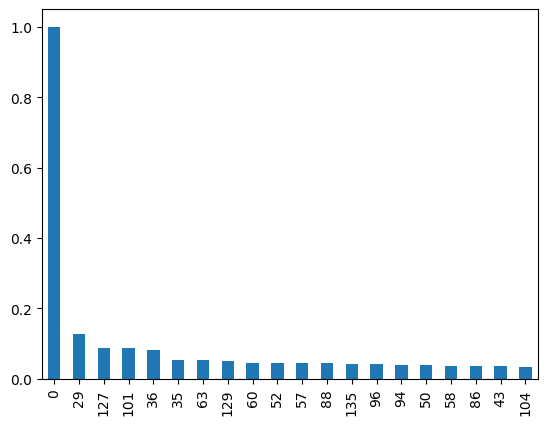

In [129]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar')

Βλέπουμε ότι με το 1ο άρθρο μοιάζει περισσότερο το 4ο

In [130]:
short_trump_df['excerpt'].loc[0]

'Ο πρώην πρόεδρος ανακοινώνει επένδυση 14 δισ. δολαρίων και 70.000 νέες θέσεις εργασίας'

In [131]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_trump_df['excerpt'])  #finds the tfidf score with normalization

In [132]:
short_trump_df['excerpt'].loc[4]

'Ο Πρόεδρος των ΗΠΑ Ντόναλντ Τραμπ αναζωπύρωσε τις εμπορικές εντάσεις την Παρασκευή, απειλώντας με την επιβολή δασμού 50% σε όλα τα προϊόντα που αποστέλλονται στις Ηνωμένες Πολιτείες από την Ευρωπαϊκή Ένωση.'

Ας δούμε αν το 115ο μοιάζει με κάποιο άλλο άρθρο

<Axes: >

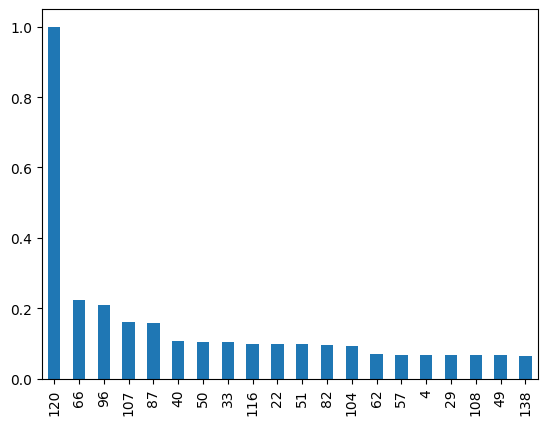

In [137]:
pd.DataFrame(arr).loc[120].sort_values(ascending = False).head(20).plot(kind = 'bar')

Ας δούμε και με ποιο διαφέρει περισσότερο

<Axes: >

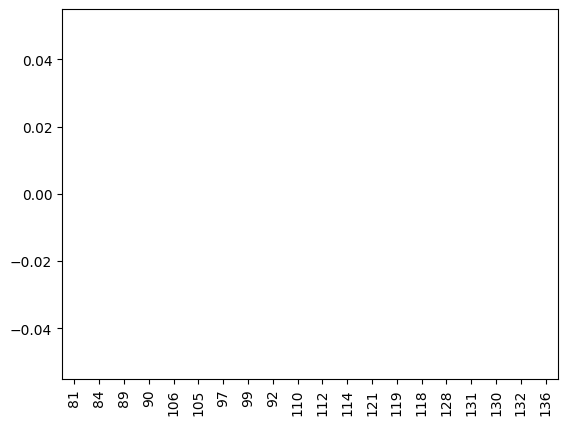

In [138]:
pd.DataFrame(arr).loc[120].sort_values(ascending = False).tail(20).plot(kind = 'bar')

In [140]:
short_trump_df['excerpt'].loc[120]

'Σε μια εντυπωσιακή σειρά εξελίξεων τις τελευταίες τρεις ημέρες, ο πρόεδρος Ντόναλντ Τραμπ επέδειξε αποφασιστική ηγεσία, σημειώνοντας σημαντικήπρόοδο σε πολλά μέτωπα.'

In [141]:
short_trump_df['excerpt'].loc[120]

'Σε μια εντυπωσιακή σειρά εξελίξεων τις τελευταίες τρεις ημέρες, ο πρόεδρος Ντόναλντ Τραμπ επέδειξε αποφασιστική ηγεσία, σημειώνοντας σημαντικήπρόοδο σε πολλά μέτωπα.'

Ας δούμε την ομοιότητα των 10 πρώτων άρθρων σε ένα γράφημα (heatmap)

In [142]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10]) # συγκρίνουμε τα 10 πρώτα άρθρα μεταξύ τους

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

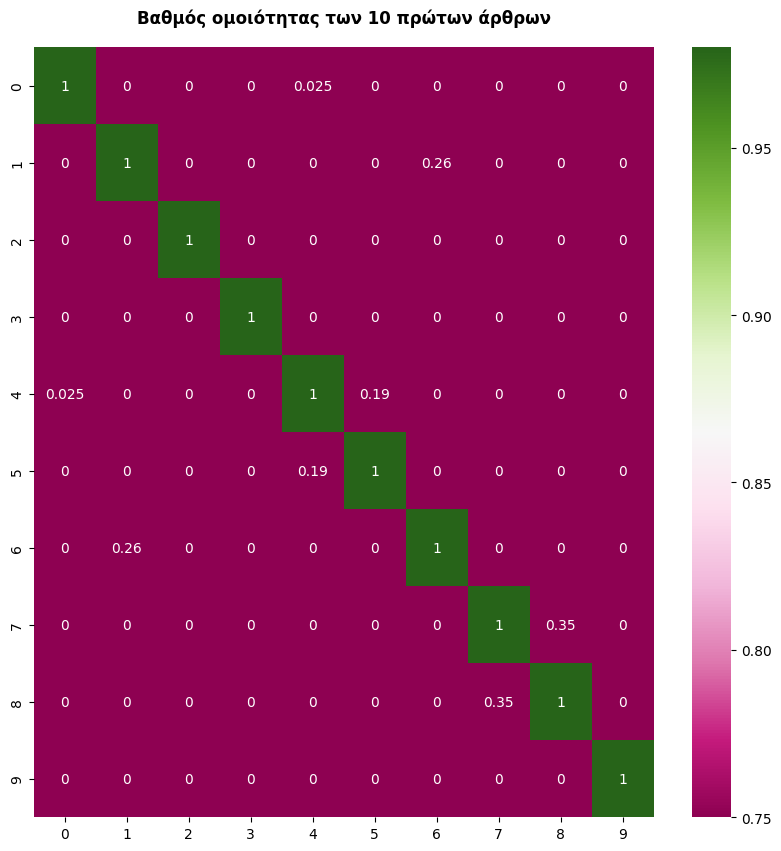

In [143]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

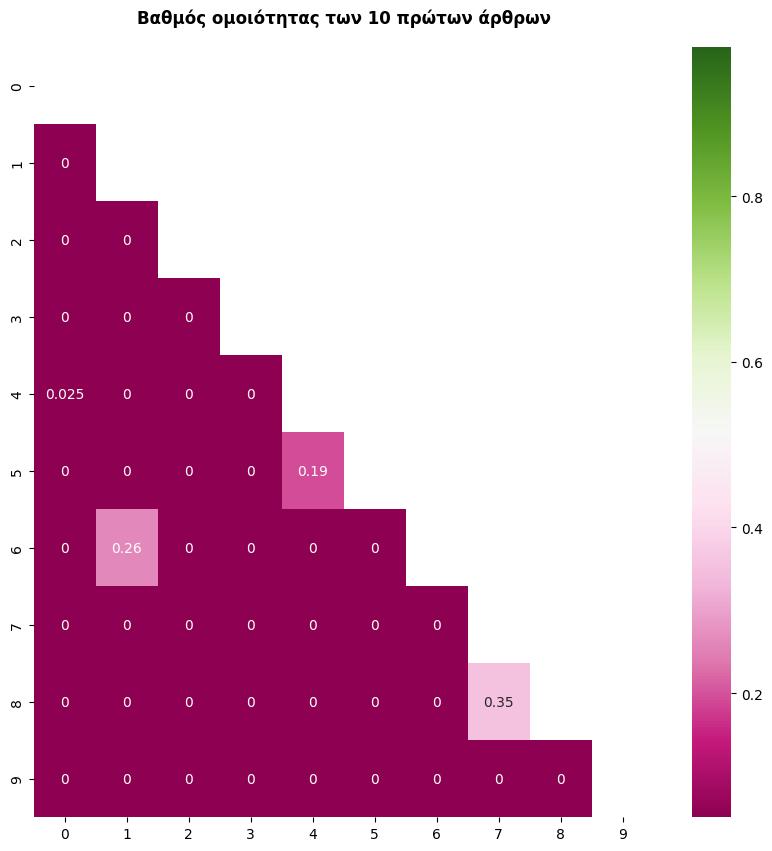

In [144]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

# mask
mask = np.triu(np.ones_like(arr, dtype=bool))
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG", mask=mask)

#plt.savefig('<το path και το όνομα του αρχείου>.png')